Dataset Head:
   noise level  label
0         61.1      0
1         61.9      0
2         61.5      0
3         60.7      0
4         59.4      0
Model Accuracy: 0.96


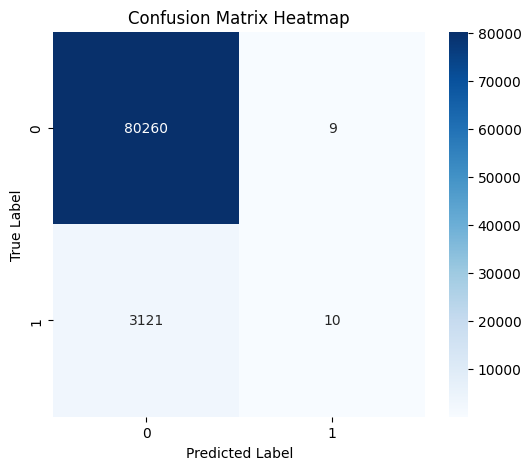

Model saved as noise_level_model.pkl
Noise Level 45 → Predicted Label: 0
Noise Level 70 → Predicted Label: 0
Noise Level 90 → Predicted Label: 1


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# ---------------- Step 1: Load and clean dataset ----------------
file_path = r"C:\Users\sagni\Downloads\Noise Mapper\noise_level_data.csv"
df = pd.read_csv(file_path)

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

print("Dataset Head:")
print(df.head())

# ---------------- Step 2: Prepare features and labels ----------------
X = df[['noise level']]  # feature
y = df['label']  # target

# ---------------- Step 3: Train-test split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------- Step 4: Train model ----------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---------------- Step 5: Predictions and Accuracy ----------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# ---------------- Step 6: Confusion Matrix Heatmap ----------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# ---------------- Step 7: Save model ----------------
joblib.dump(model, "noise_level_model.pkl")
print("Model saved as noise_level_model.pkl")

# ---------------- Step 8: Future Prediction ----------------
# Load the saved model
loaded_model = joblib.load("noise_level_model.pkl")

# Example future noise level values
future_noise_levels = np.array([[45], [70], [90]])  # Replace with actual readings

future_predictions = loaded_model.predict(future_noise_levels)

for level, pred in zip(future_noise_levels.flatten(), future_predictions):
    print(f"Noise Level {level} → Predicted Label: {pred}")
